# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [45]:
# !pip install numpy
# !pip install pandas

Import the core data science libraries:

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [47]:
# place your code into this Code cell
df = pd.read_csv("data/data.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

In the cell below, I showed 5 rows randomly selected from the dataset to see what's the original layout of the data

In [48]:
df.sample(5)

,COUB,Country of birth,FBORN,Place of birth,EDU,Education level,LFS,Labour force status,FSTUDY,Field of study,COU,Country of residence,Value,Flag Codes,Flags
15870,ALL_COUB,All countries of birth,1,Foreign-born,3_4,ISCED 5/6,ALL_LFS,All labour force status,8,Health And Welfare,HUN,Hungary,7097,NaN,NaN
18129,ALL_COUB,All countries of birth,ALL_FBORN,All places of birth,3,ISCED 5,1,Employed,7,Agriculture,IRL,Ireland,10389,NaN,NaN
1038,NOAM,North America,1,Foreign-born,3,ISCED 5,2,Unemployed,6,"Engineering, Manufacturing And Construction",AUS,Australia,114,NaN,NaN
20126,ALL_COUB,All countries of birth,ALL_FBORN,All places of birth,4,ISCED 6,1,Employed,99,Unknown,MEX,Mexico,17124,NaN,NaN
8573,ALL_COUB,All countries of birth,ALL_FBORN,All places of birth,3_4,ISCED 5/6,1,Employed,9,Services,CZE,Czechia,8422,NaN,NaN


In the cell below, I showed each of the column names and their data types
- we can see that there are in total 15 columns
- most of the columns are in the data type of object

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   COUB                  35000 non-null  object 
 1   Country of birth      35000 non-null  object 
 2   FBORN                 35000 non-null  object 
 3   Place of birth        35000 non-null  object 
 4   EDU                   35000 non-null  object 
 5   Education level       35000 non-null  object 
 6   LFS                   35000 non-null  object 
 7   Labour force status   35000 non-null  object 
 8   FSTUDY                35000 non-null  object 
 9   Field of study        35000 non-null  object 
 10  COU                   35000 non-null  object 
 11  Country of residence  35000 non-null  object 
 12  Value                 35000 non-null  int64  
 13  Flag Codes            0 non-null      float64
 14  Flags                 0 non-null      float64
dtypes: float64(2), int6

It's important to note that some of the data is missing in the table, for example the "Flag Codes" and "Flags" column. The following is an example of this kind of row.

In [50]:
df.sample(1)

,COUB,Country of birth,FBORN,Place of birth,EDU,Education level,LFS,Labour force status,FSTUDY,Field of study,COU,Country of residence,Value,Flag Codes,Flags
17866,ALL_COUB,All countries of birth,ALL_FBORN,All places of birth,3_4,ISCED 5/6,2,Unemployed,5,Science,IRL,Ireland,3411,NaN,NaN


And there's also cell where "Country of birth" shows "All countries of birth", which is not a useful information to our dataset.

In [51]:
filtered_df = df[df['Country of birth'] == 'All countries of birth']
filtered_df.sample(1)

,COUB,Country of birth,FBORN,Place of birth,EDU,Education level,LFS,Labour force status,FSTUDY,Field of study,COU,Country of residence,Value,Flag Codes,Flags
10542,ALL_COUB,All countries of birth,0,Native-born,4,ISCED 6,2,Unemployed,6,"Engineering, Manufacturing And Construction",DNK,Denmark,9,NaN,NaN


## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### Keep only important columns
After viewing the original data, I want to only focus on the following columns: COUB, Country of birth, Place of birth, Labour force status, Field of study, Country of residence, Value.

In [52]:
df = df[['COUB', 'Country of birth','Place of birth','Labour force status','Field of study','Country of residence','Value']]
df.sample(5)

,COUB,Country of birth,Place of birth,Labour force status,Field of study,Country of residence,Value
30643,ALL_COUB,All countries of birth,All places of birth,Inactive,Health And Welfare,Sweden,56160
33109,SCAC,South and Central America and Caribbean,Foreign-born,Inactive,Education,OECD - Total,11397
29540,NOAM,North America,All places of birth,Inactive,Unknown,Sweden,15
5053,EURO,Europe,All places of birth,All labour force status,Art And Humanities,Canada,77300
32803,OCEA,Oceania,Native-born,Inactive,Health And Welfare,OECD - Total,2348


### Delete rows without specific country of birth
As mentioned when inspecting the data, some of the data contain useless information about country of birth and residence, I use the following code to drop all those rows.

In [53]:
df = df[df['Country of birth'] != 'All countries of birth']
df.sample(5)

,COUB,Country of birth,Place of birth,Labour force status,Field of study,Country of residence,Value
5148,NOAM,North America,Native-born,All labour force status,Agriculture,Canada,121385
24147,OTHER,Other and unknown places of birth,Unknown place of birth,All labour force status,Education,Norway,1
31107,ASIA,Asia,All places of birth,Employed,Art And Humanities,OECD - Total,81016
23327,EURO,Europe,Native-born,Unemployed,Health And Welfare,Norway,615
13690,NOAM,North America,All places of birth,Employed,"Engineering, Manufacturing And Construction",Greece,26


## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### Analysis 1: total records
I looked at the total number of individual level information we have. Which is the sum of the "Value" column.

The result I got is 1115647520.

In [54]:
df['Value'].sum()

1115647520

### Analysis 2: number of records across each continent
I used the groupby method to calculate the number of records I had for each continent.

In [55]:
df.groupby('COUB')['Value'].sum()

COUB
AFRI       9709056
ASIA      42154400
EURO     512754880
NOAM     194531616
OCEA      81167648
OTHER      2732160
SCAC     272597760
Name: Value, dtype: int64

### Analysis 3: which field of study has the most records of immigrants (where country of birth is North America)
I want to see which field of study has most people migrating out of North America.

So I filtered the data and arrange them in descending order.

Excluding the non-specific fileds of study, we can see that people born in North America studying Social Sciences, Business And Law has the biggest number of records.

In [56]:
filtered_df = df[df['Country of birth'] == 'North America']
filtered_df.groupby('Field of study')['Value'].sum().sort_values(ascending=False)

Field of study
All fields of study                            97265808
Social Sciences, Business And Law              32924880
Health And Welfare                             15055360
Education                                      11452112
Engineering, Manufacturing And Construction    11063168
Art And Humanities                             10344736
Science                                         8956640
Services                                        4977888
Agriculture                                     2010784
General Programme                                314352
Unknown                                          165888
Name: Value, dtype: int64

### Analysis 4: number of Immigrants 'Employed' and 'Unemployed' studying Science as percentage
I calculated the sum of people indicating labour force status as Employed or Unemployed and having 'Field of study' as Science.

The result shows that about **38.5%** percent of immigrants studying Science indentify themselves as Employed and about **2%** of them identify themselves as Unemployed.

In [57]:
filtered_df = df[(df['Field of study'] == 'Science')]

# Employed:
print(filtered_df[(filtered_df['Labour force status'] == 'Employed')]['Value'].sum() * 100/filtered_df['Value'].sum())

# Unemployed:
print(filtered_df[(filtered_df['Labour force status'] == 'Unemployed')]['Value'].sum() * 100/filtered_df['Value'].sum())

38.47887513757553
2.0111183486444597


### Analysis 5: the top five place of residence that has the most records of immigrants
I calculated the number of immigrants based on place of residence to find where could be the most popular place to go.

We can see that Mexico is the most popular destination according to this data set.

In [58]:
df.groupby('Country of residence')['Value'].sum().sort_values(ascending=False).head(5)

Country of residence
OECD - Total    557823760
Mexico          130661344
Canada          125875520
Spain           100873280
Australia        44980352
Name: Value, dtype: int64

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### Visualization 1: bar chart of number of immigrants in each field of study

I calculated the sum of values grouping by field of study, and use that information to create the chart.

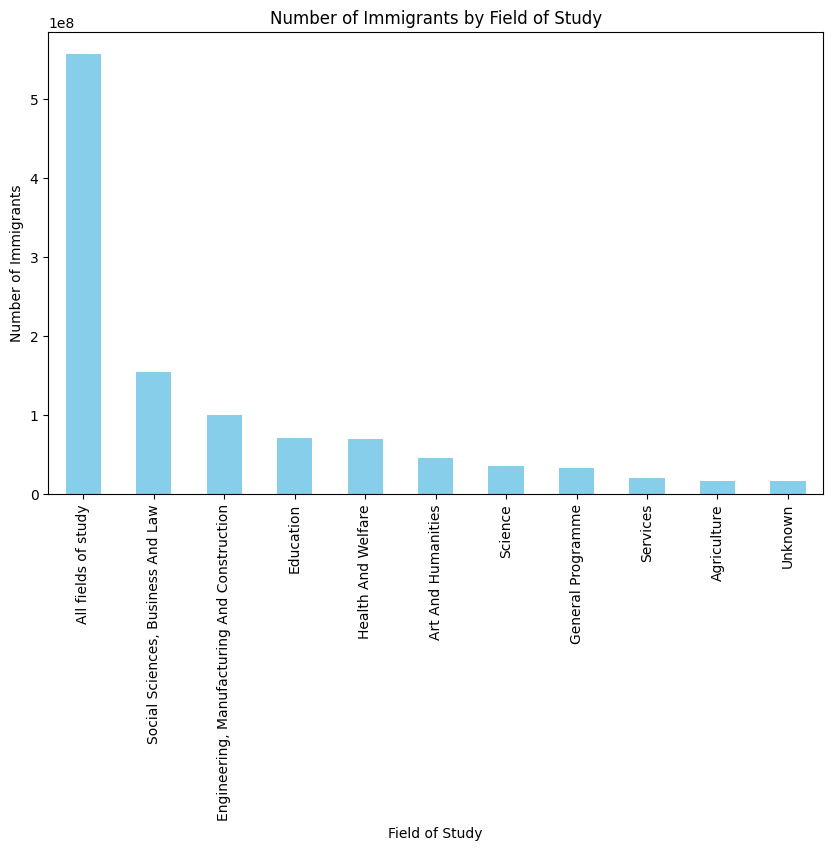

In [59]:
field_study_sums = df.groupby('Field of study')['Value'].sum().sort_values(ascending=False)

field_study_sums.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Immigrants by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of Immigrants')
plt.show()

### Visualization 2: pie chart of fields of study of immigrants born in Asia

I filtered the data where 'Country of birth' is 'Asia and created the following plot.

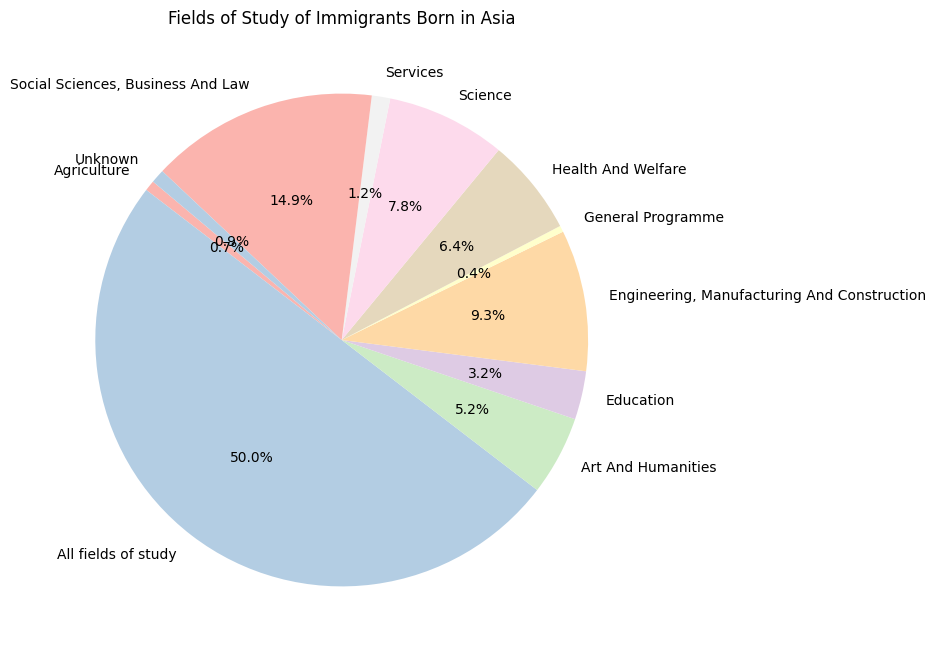

In [60]:
asian_df = df[(df['Country of birth'] == 'Asia')]
field_study_sums = asian_df.groupby('Field of study')['Value'].sum()

plt.figure(figsize=(8, 8))
plt.pie(field_study_sums, labels=field_study_sums.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Fields of Study of Immigrants Born in Asia')
plt.show()

### Visualization 3: stacked area chart of immigrants by field of study over country of birth

There's no additional filtering I need to do with the data for creating this chart.

However, because my data set doesn't contain time related information, the stack area chart might not be the best way of visualizating the data.

<Figure size 1000x600 with 0 Axes>

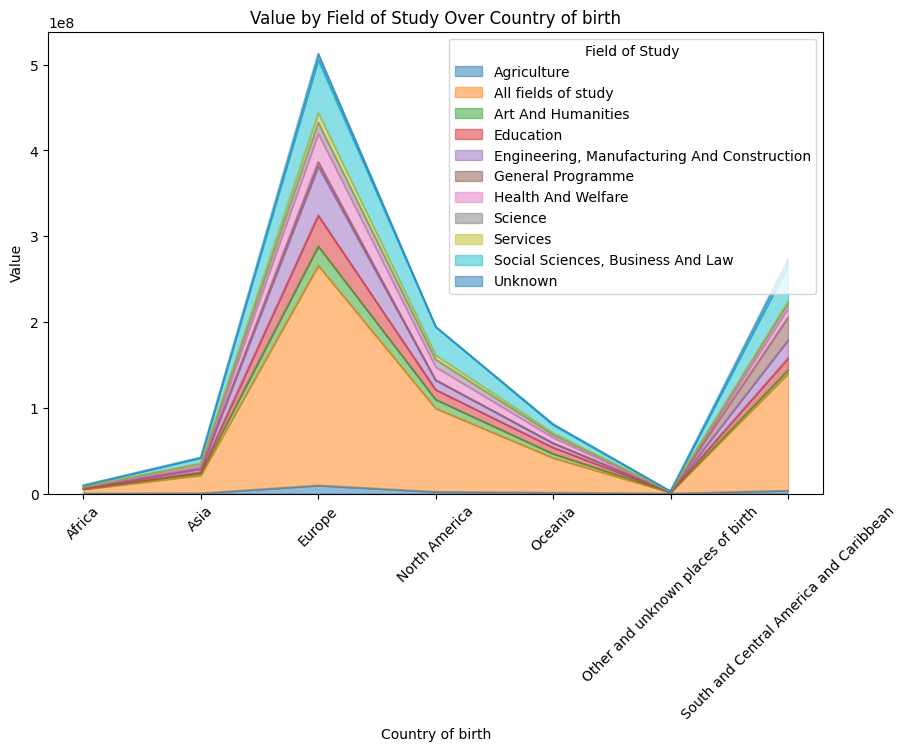

In [61]:
pivot_df = df.pivot_table(values='Value', index='Country of birth', columns='Field of study', aggfunc='sum')

plt.figure(figsize=(10, 6))
pivot_df.plot(kind='area', stacked=True, alpha=0.5, figsize=(10, 6))
plt.title('Value by Field of Study Over Country of birth')
plt.xlabel('Country of birth')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(title='Field of Study')
plt.show()

### Visualization 4: bar chart of labour force status over field of study

This visualization also doesn't requir further filtering of the origianl data set.

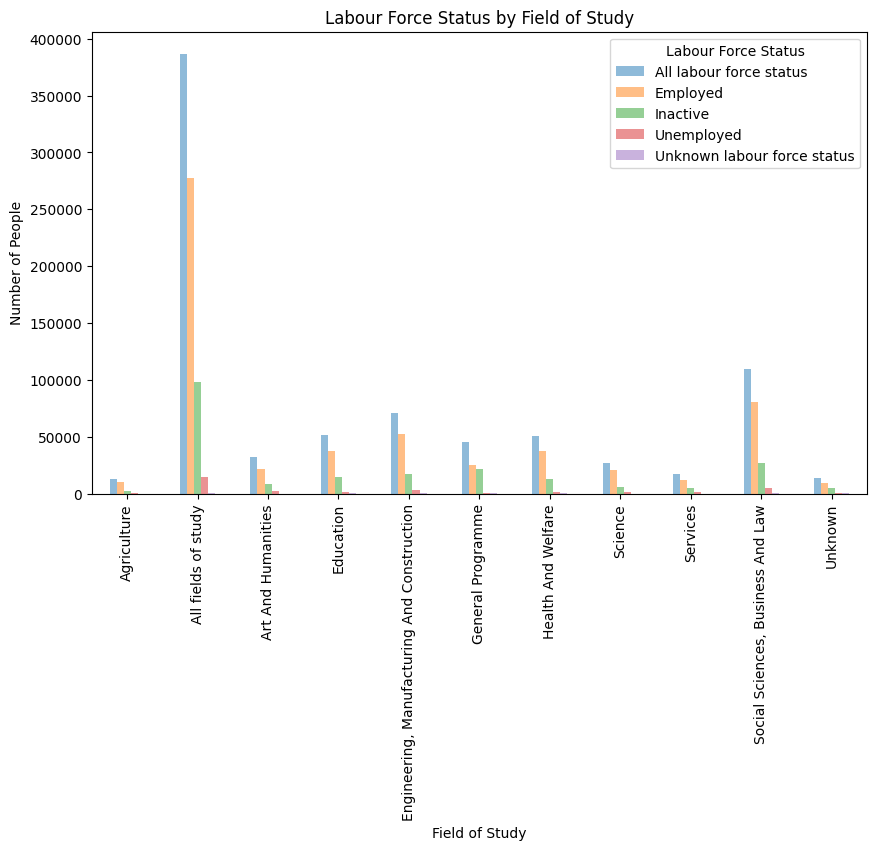

In [62]:
pivot_df = df.pivot_table(values='Value', index='Field of study', columns='Labour force status', fill_value=0)

pivot_df.plot(kind='bar', figsize=(10, 6), alpha=0.5)
plt.title('Labour Force Status by Field of Study')
plt.xlabel('Field of Study')
plt.ylabel('Number of People')
plt.legend(title='Labour Force Status')
plt.show()

### Visualization 5: bar chart of country of residence for immigrants born in Asia

I filtered the dataframe to the series where 'Country of born' is 'Asia', and created the chart.

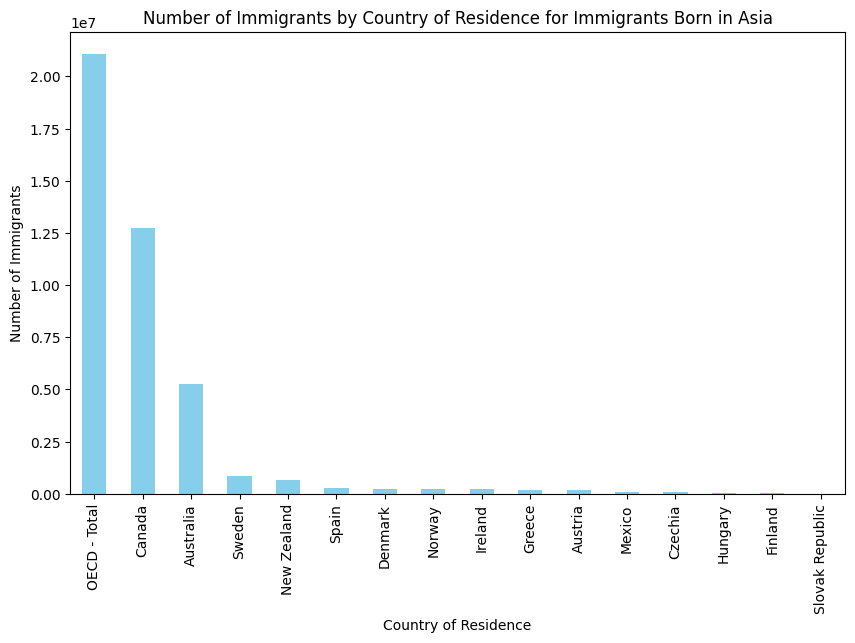

In [63]:
df_asian_born = df[(df['Country of birth'] == 'Asia')]

residence_counts = df_asian_born.groupby('Country of residence')['Value'].sum().sort_values(ascending=False)

residence_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Number of Immigrants by Country of Residence for Immigrants Born in Asia')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Immigrants')
plt.show()